In [30]:
%%HTML
<link rel="stylesheet" type="text/css" href="../custom.css">

# 応用計量分析２（第9回）







### 担当教員: 梶野 洸（かじの ひろし）


# 本日の目標

- オブジェクト指向の流儀で正規分布を実装する
- 数式を伴う実装の考え方を紹介する

# Python での実装

まずは正規分布クラスを実装してみよう

In [2]:
import numpy as np

class Gaussian:
    def __init__(self, dim):
        '''コンストラクタ（みたいなもの）
        オブジェクトを作るときに初めに実行される。
        内部状態の初期化に使う
        '''
        self.dim = dim
        '''
        self = オブジェクトを指す。 self.dim は、オブジェクトの dim という変数を指す。
        上の命令は、 self.dim に dim の値を代入することを表す
        '''
        self.mean = np.random.randn(dim) # オブジェクトの mean という変数をランダムに初期化
        self.cov = np.identity(dim)

    def log_pdf(self, X):
        ''' 確率密度関数の対数を返す
        
        Parameters
        ----------
        X : numpy.array, shape (sample_size, dim)
        
        Returns
        -------
        log_pdf : array, shape (sample_size,)
        '''
        return 0
    
    
    def fit(self, X):
        ''' X を使って最尤推定をする
                
        Parameters
        ----------
        X : numpy.array, shape (sample_size, dim)
        '''
        pass

    def sample(self, sample_size):
        ''' 現状のパラメタを使って `sample_size` のサイズのサンプルを生成する
        
        Parameters
        ----------------
        sample_size : int
        
        Returns
        -----------
        X : numpy.array, shape (sample_size, dim)
            各行は平均 `self.mean`, 分散 `self.cov` の正規分布に従う
        '''
        pass

# `log_pdf` を書く手順を解説します

- 入力は `sample_size` x `dim` の array
- 出力は長さ `sample_size` の array
    - 各データの確率密度の対数を計算したい

# `log_pdf(self, X)` の実装

$$
\log p(x \mid \mu, \Sigma) = -\dfrac{1}{2} (x - \mu)^\top \Sigma^{-1} (x - \mu) - \dfrac{D}{2}\log 2\pi - \dfrac{1}{2} \log |\Sigma|
$$

1. $- \dfrac{D}{2}\log 2\pi - \dfrac{1}{2} \log |\Sigma|$ の計算
1. $-\dfrac{1}{2} (x - \mu)^\top \Sigma^{-1} (x - \mu)$ の計算
    1. $X$ がベクトルの時（データが一個の時）
    1. $X$ が行列の時（データが複数個あってそれぞれについて計算したい時）

#### 1. $- \dfrac{D}{2}\log 2\pi - \dfrac{1}{2} \log |\Sigma|$ の計算
$\log$ は `np.log`, log determinant は `np.linalg.slogdet` で計算できるので

In [32]:
dim = 5
cov = np.identity(dim) # とりあえず単位行列で計算できるか確かめる

- 0.5 * dim * np.log(2 * np.pi) - 0.5 * np.linalg.slogdet(cov)[1]

-4.594692666023363

#### 2. $-\dfrac{1}{2} (x - \mu)^\top \Sigma^{-1} (x - \mu)$の計算（データが一個）
1. $x-\mu$ を計算する
1. $\Sigma^{-1}(x-\mu)$ を計算する
1. $-\dfrac{1}{2}(x-\mu)^{-1} \Sigma^{-1} (x-\mu)$を計算する

In [33]:
dim = 10
x = np.ones(dim)
mean = np.zeros(dim)
cov = 2.0 * np.identity(dim)

centered_x = x - mean
print(centered_x)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [34]:
cov_inv_centered_x = np.linalg.solve(cov, centered_x)
print(cov_inv_centered_x)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


In [35]:
-0.5 * (centered_x @ cov_inv_centered_x)

-2.5

#### 2. $-\dfrac{1}{2} (x - \mu)^\top \Sigma^{-1} (x - \mu)$の計算（データが複数個）
1. $x-\mu$ を計算する
1. $\Sigma^{-1}(x-\mu)$ を計算する
1. $-\dfrac{1}{2}(x-\mu)^{\top} \Sigma^{-1} (x-\mu)$を計算する

In [37]:
dim = 3
sample_size = 10

X = np.arange(sample_size * dim).reshape(sample_size, dim)
mean = np.ones(dim)
cov = 2.0 * np.identity(dim)
print(X, mean)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]] [1. 1. 1.]


In [38]:
centered_X = X - mean
print(centered_X)

[[-1.  0.  1.]
 [ 2.  3.  4.]
 [ 5.  6.  7.]
 [ 8.  9. 10.]
 [11. 12. 13.]
 [14. 15. 16.]
 [17. 18. 19.]
 [20. 21. 22.]
 [23. 24. 25.]
 [26. 27. 28.]]


In [39]:
cov_inv_centered_X = np.linalg.solve(cov, centered_X.T).T
print(cov_inv_centered_X)

[[-0.5  0.   0.5]
 [ 1.   1.5  2. ]
 [ 2.5  3.   3.5]
 [ 4.   4.5  5. ]
 [ 5.5  6.   6.5]
 [ 7.   7.5  8. ]
 [ 8.5  9.   9.5]
 [10.  10.5 11. ]
 [11.5 12.  12.5]
 [13.  13.5 14. ]]


In [42]:
-0.5 * np.sum(centered_X * cov_inv_centered_X, axis=1)

array([-5.0000e-01, -7.2500e+00, -2.7500e+01, -6.1250e+01, -1.0850e+02,
       -1.6925e+02, -2.4350e+02, -3.3125e+02, -4.3250e+02, -5.4725e+02])

# それぞれの項をまとめて関数を作る

In [43]:
import numpy as np

class Gaussian:
    def __init__(self, dim):
        '''コンストラクタ（みたいなもの）
        オブジェクトを作るときに初めに実行される。
        内部状態の初期化に使う
        '''
        self.dim = dim
        '''
        self = オブジェクトを指す。 self.dim は、オブジェクトの dim という変数を指す。
        上の命令は、 self.dim に dim の値を代入することを表す
        '''
        self.mean = np.random.randn(dim) # オブジェクトの mean という変数をランダムに初期化
        self.cov = np.identity(dim)
        
    def log_pdf(self, X):
        ''' 確率密度関数の対数を返す
        
        Parameters
        ----------
        X : numpy.array, shape (sample_size, dim)
        
        Returns
        -------
        log_pdf : array, shape (sample_size,)
        '''
        centered_X = X - self.mean
        cov_inv_centered_X = np.linalg.solve(self.cov, centered_X.T).T
        log_pdf = - 0.5 * self.dim * np.log(2 * np.pi) - 0.5 * np.linalg.slogdet(self.cov)[1] - 0.5 * np.sum(centered_X * cov_inv_centered_X, axis=1)
        return log_pdf

In [45]:
my_gaussian = Gaussian(dim=2)
X = np.zeros((10, 2))
my_gaussian.mean = np.zeros(2)
my_gaussian.log_pdf(X)

array([-1.83787707, -1.83787707, -1.83787707, -1.83787707, -1.83787707,
       -1.83787707, -1.83787707, -1.83787707, -1.83787707, -1.83787707])

# 実装の手順まとめ
1. 実装したいものを数式で書き起こす
1. 数式を計算するには何をどの順番で計算したらいいかを考える
    - なるべく細かくする
    - 全然わからないときは、実装したいものを単純化したもので考えるのも手
1. それぞれの手順を実装して、手元で動くか確かめる
    - 配列の大きさのチェックをする
    - できれば検算も
1. 組み合わせてクラスに実装する

# 課題

1. `fit` を完成させよ。
    - 入力は `sample_size` x `dim` の array `X`
    - `self.mean` と `self.cov` を `X` で計算した最尤推定量で更新する
1. `sample` を完成させよ。
    - 入力は `sample_size`
    - 出力は平均 `self.mean`、分散`self.cov` の正規分布に従う乱数

In [46]:
import numpy as np

class Gaussian:
    def __init__(self, dim):
        '''コンストラクタ（みたいなもの）
        オブジェクトを作るときに初めに実行される。
        内部状態の初期化に使う
        '''
        self.dim = dim
        '''
        self = オブジェクトを指す。 self.dim は、オブジェクトの dim という変数を指す。
        上の命令は、 self.dim に dim の値を代入することを表す
        '''
        self.mean = np.random.randn(dim) # オブジェクトの mean という変数をランダムに初期化
        self.cov = np.identity(dim)

    def log_pdf(self, X):
        ''' 確率密度関数の対数を返す
        
        Parameters
        ----------
        X : numpy.array, shape (sample_size, dim)
        
        Returns
        -------
        log_pdf : array, shape (sample_size,)
        '''
        if X.shape[1] != self.dim: # 入力の形をチェックしています
            raise ValueError('X.shape must be (sample_size, dim)')
        return -0.5 * np.sum((X - self.mean) * (np.linalg.solve(self.cov, (X - self.mean).T).T), axis=1) \
            -0.5 * self.dim * np.log(2.0 * np.pi) - 0.5 * np.linalg.slogdet(self.cov)[1]

    def fit(self, X):
        ''' X を使って最尤推定をする
                
        Parameters
        ----------
        X : numpy.array, shape (sample_size, dim)
        '''
        if X.shape[1] != self.dim: # 入力の形をチェックしています
            raise ValueError('X.shape must be (sample_size, dim)')
        self.mean = np.mean(X, axis=0)
        self.cov = (X - self.mean).T @ (X - self.mean) / X.shape[0]

    def sample(self, sample_size):
        ''' 現状のパラメタを使って `sample_size` のサイズのサンプルを生成する
        
        Parameters
        ----------------
        sample_size : int
        
        Returns
        -----------
        X : numpy.array, shape (sample_size, dim)
            各行は平均 `self.mean`, 分散 `self.cov` の正規分布に従う
        '''
        return np.random.multivariate_normal(self.mean, self.cov, size=sample_size)

# ポイント

1. 逆行列を使わず、線型方程式を解く
1. for文を使わず、行列演算で頑張る
$$ \sum_{n=1}^N x_n x_n^\top = \begin{bmatrix}x_1 & x_2 & \dots & x_N\end{bmatrix} \begin{bmatrix}x_1^\top \\ x_2^\top \\ \vdots \\ x_N^\top\end{bmatrix} $$

以下のように分解してみるとわかる
$$
 \begin{bmatrix}x_1 & x_2 & \dots & x_N\end{bmatrix} = \begin{bmatrix}x_1 & 0 & \dots & 0\end{bmatrix} + \begin{bmatrix}0 & x_2 & \dots & 0\end{bmatrix} + \cdots + \begin{bmatrix}0 & 0 & \dots & x_N\end{bmatrix}
$$

# クラスの使い方

- オブジェクトを作る

In [47]:
my_model = Gaussian(2) # my_model というオブジェクトが出来た

In [48]:
print(my_model.mean, my_model.cov) # 平均、共分散行列を持っている

[-0.16551882  0.43197104] [[1. 0.]
 [0. 1.]]


In [49]:
my_model_1 = Gaussian(2) # 他のオブジェクトも作れる
print(my_model_1.mean, my_model_1.cov) # 平均はランダムに初期化されるため my_model とは異なる

[-0.85714704 -0.17641052] [[1. 0.]
 [0. 1.]]


- 命令する（メソッドを実行する）

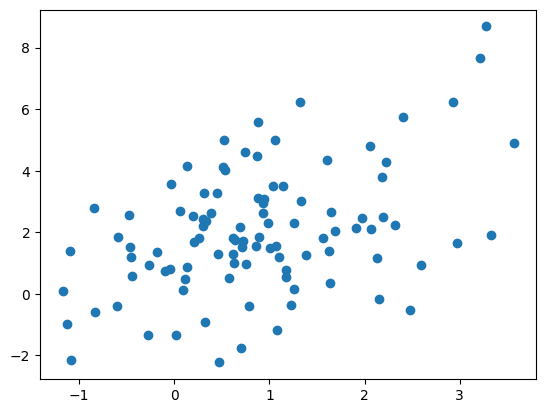

In [50]:
X = np.random.multivariate_normal(np.array([1.0, 2.0]), np.array([[1.0, 0.9], [0.9, 4.0]]), size=100)
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [51]:
my_model.fit(X) # X で最尤推定をして、 mean, cov を更新する
print(my_model.mean)
print(my_model.cov)

[0.87734624 2.01389858]
[[1.09402403 0.92259907]
 [0.92259907 4.05046877]]


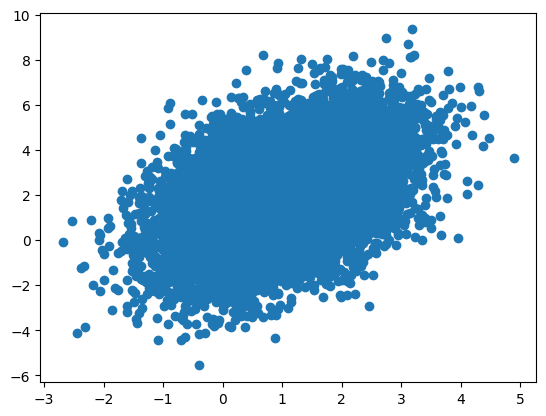

[1.01693318 2.03092636] [[0.98525066 0.87832014]
 [0.87832014 3.95891862]]


In [52]:
# サンプルサイズを大きくすると、真値に近くなる
X = np.random.multivariate_normal(np.array([1.0, 2.0]), np.array([[1.0, 0.9], [0.9, 4.0]]), size=10000)
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.show()
my_model.fit(X)
print(my_model.mean, my_model.cov)

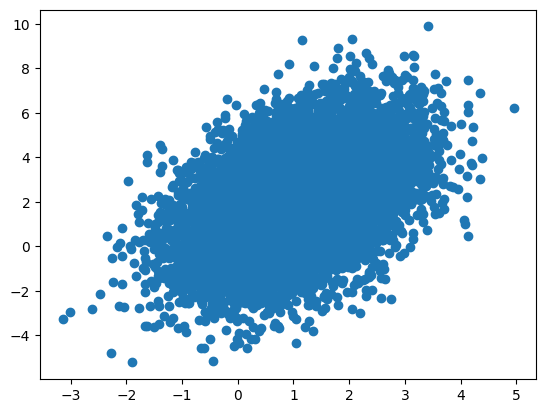

In [53]:
# サンプリングを試してみる
sample = my_model.sample(10000)
plt.scatter(sample[:, 0], sample[:, 1])
plt.show()

In [55]:
my_model.mean = np.array([0, 0])
my_model.cov = np.identity(2)
np.exp(my_model.log_pdf(np.array([[0,0]]))) # 1次元の Normal distribution だと 0.4 くらいなので、二次元だと0.16くらいのはず

array([0.15915494])

# ここまでのまとめ

- 統計モデルはクラスを使って書く
    - 内部状態 = モデルのパラメタ、ハイパーパラメタ
    - メソッド = パラメタ推定、予測、入力チェック、内部状態更新

# 演習（必須ではない）

1. さいころの目
1. 前回作った PCA をクラスの形で書き換えよ

In [ ]:
class Dice:
    
    def __init__(self, n_faces):
        self.n_faces = n_faces
        self.set_prob(np.ones(self.n_faces) / self.n_faces)
        
    def set_prob(self, prob_array):
        if not np.allclose(prob_array.sum(), 1.0):
            raise ValueError('prob_array must be normalized.')
        if prob_array.shape != (self.n_faces,):
            raise ValueError(f'prob_array must be of shape ({self.n_faces},)')
        self.prob_array = prob_array
        
    def fit(self, X):
        '''
        Parameters
        ----------
        X : array, shape (n_faces, )
            X[i] は i 番目の目が出た回数を表す
        '''
        self.set_prob(X / X.sum())
    
    def sample(self, n_trials):
        '''
        Parameters
        ----------
        n_trials : int
            さいころを振る回数
        
        Returns
        ------
        X : array, shape (n_faces,)
            X[i] は i 番目の目が出た回数を表す
        '''
        return np.random.multinomial(n_trials, self.prob_array)

In [ ]:
from scipy.linalg import eigh

class PCA:
    def __init__(self, input_dim, n_components):
        self.input_dim = input_dim
        self.n_components = n_components
        self.set_encoder(np.eye(self.input_dim)[:self.n_components, :])
    
    def set_encoder(self, encoder):
        if encoder.shape != (self.n_components, self.input_dim):
            raise ValueError(f'encoder must have shape {(self.n_components, self.input_dim)}')
        if np.abs(encoder @ encoder.transpose() - np.eye(self.n_components)).max() > 1e-4:
            raise ValueError('encoder must be orthonormal.')
        self.encoder = encoder
        
    def fit(self, X):
        eig_val, eig_vec = eigh(X.T @ X)
        self.set_encoder(eig_vec[:, -self.n_components:].transpose())

    def transform(self, X):
        return X @ self.encoder.transpose()

    def inverse_transform(self, z):
        return z @ self.encoder

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# データを取得
dataset = fetch_olivetti_faces()
num_examples, row_size, col_size = dataset['images'].shape
X = dataset['data']

# 平均0にしておく（しなくてもまあ大丈夫だけど）
X_mean = X.mean(axis=0)
X_centered = X - X_mean

n_components=20

pca = PCA(X.shape[1], n_components)
pca.fit(X_centered)

In [ ]:
z = pca.transform(X_centered)
X_rec = pca.inverse_transform(z) + X_mean
idx = 190

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(dataset['images'][idx], cmap=plt.cm.gray) # 左が元の画像
ax2.imshow(X_rec[idx].reshape(row_size, col_size), cmap=plt.cm.gray) # 右が再構成画像
plt.show()